In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9122
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1425 - accuracy: 0.9574: 0s - loss: 0.1430 - accuracy
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9765
313/313 - 0s - loss: 0.0735 - accuracy: 0.9778


[0.07354684174060822, 0.9778000116348267]

sparse_categorical_crossentropy vs categorical_crossentropy

In [6]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9765: 0s - loss: 0.0757 - accuracy: 0.
313/313 - 0s - loss: 0.0769 - accuracy: 0.9756


[0.07693803310394287, 0.975600004196167]

모델로 예측하기

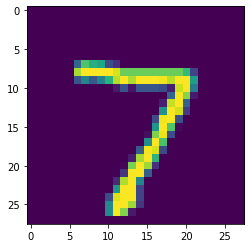

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
img = tf.reshape(x_test[0], (1, 28, 28))

In [10]:
model.predict(img)

array([[2.2374481e-08, 9.7174144e-09, 2.8675208e-06, 1.7393423e-04,
        1.2804448e-12, 6.3867603e-08, 1.2330297e-12, 9.9982291e-01,
        3.3859322e-08, 3.2451521e-08]], dtype=float32)

모델의 저장 및 불러오기

In [11]:
model_path = "beginner.h5"
model.save(model_path)

In [12]:
restored_model = tf.keras.models.load_model(model_path)

restored_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0769 - accuracy: 0.9756


[0.07693803310394287, 0.975600004196167]

array([[2.9475672e-07, 2.6047153e-06, 5.4443564e-04, 9.7153161e-04,
        2.0822484e-02, 7.9629075e-04, 3.5503453e-07, 7.4194963e-05,
        6.8658534e-05, 9.7671914e-01]], dtype=float32)

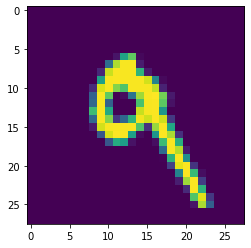

In [13]:
plt.imshow(x_test[7])
img = tf.reshape(x_test[7], (1, 28, 28))

restored_model.predict(img)